In [170]:
from scipy.stats import bernoulli, truncnorm
import matplotlib.pyplot as plt
import numpy as np
import random

## Discrete Priors

We have an experiment, that is there are five coins in a draw and we select one at random. We then hypothesise that we have selected A, B or C. The prior probability is the probability of selecting each coin. We then toss the coin and record the result. Our likelihood is the probability of getting the outcome for each hypothesis.

In [171]:
# Priors. 5 coins in draw: 2 * A, 2 * B, 1 * C.
pA = 0.4
pB = 0.4
pC = 0.2

In [172]:
# Perform an experiment, select a coin. Our hypotheses are that we have picked A, B and C. That is, our theta value
# is 0.6, 0.7 or 0.9. We know the prior probability of each hypothesis being true:
pA = 0.4
pB = 0.4
pC = 0.2

In [173]:
def bayes_update_discrete(pA, pB, pC, x):
    """Performs one Bayesian update.
    """
    # Get likelihoods.
    if x == 0:
        lA = 1 - pH_A
        lB = 1 - pH_B
        lC = 1 - pH_C
    elif x == 1:
        lA = pH_A
        lB = pH_B
        lC = pH_C
    
    # Get numerators.
    nA = lA * pA
    nB = lB * pB
    nC = lC * pC
    
    # Get total.
    total = nA + nB + nC
    
    # Return posteriors.
    postA = nA / total
    postB = nB / total
    postC = nC / total
    
    return postA, postB, postC

In [174]:
# Set initial prior.
prA, prB, prC = pA, pB, pC

n = 100
# Update n times.
for i in range(0, n):
    # Make a random draw from our true coin B.
    x = bernoulli.rvs(pH_B)

    # Perform Bayes update.
    prA, prB, prC = bayes_update_discrete(prA, prB, prC, x)
    
# Posterior moves towards 1 for hypothesis B, which is the correct hypothesis.
print(f"A: {prA:.2f}\nB: {prB:.2f}\nC: {prC:.2f}")

A: 0.10
B: 0.90
C: 0.00


## Continuous Priors

We have a coin with unknown probability of heads $\theta$. This parameter is itself a random variable $\Theta$, with values $\theta$. We can initially suppose that $\Theta$ has a uniform probability distribution of $f(\theta) = 1$ over the range [0, 1].

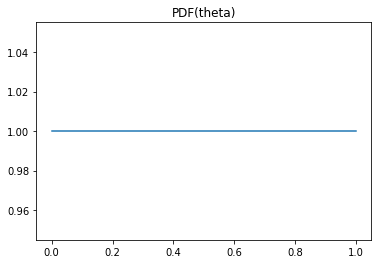

In [211]:
# Plot PDF.
x = np.linspace(0, 1, 100)
plt.plot(x, np.ones(len(x)))
plt.title("PDF(theta)")
plt.show()

In [212]:
def truncated_normal(mean=0, sd=1, low=0, upp=1):
    """Draws a value from the normal distribution truncated to the specified range.
    """
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [213]:
# Theta actually follows a normal distribution. Let's pull our value from that.
# theta = truncated_normal(0.5, 1, 0, 1).rvs()
theta = 0.16546305924217014
theta 

0.16546305924217014

### Prior

Our prior is $P(\Theta = \theta) = f(\theta)d\theta = d\theta$. Integrating over the range [0, 1], we get the total probability for all hypotheses, which equals 1 as expected.

In [182]:
# Draw heads or tails.
x = bernoulli(theta).rvs()
x

0

### Likelihood

Our likelihood is the probability of seeing the data given our continous hypothesis theta. We got tails, so $x = 0$ and our $p(x = 0 | \theta) = 1 - \theta$.

### Bayes numerator

The Bayes numerator is the product of the prior and likelihood. We get $(1 - \theta)d\theta$.

### Total law of probability

To get the total probability $P(x = 0)$, we calculate $\int_0^1p(x = 0 | \theta)f(\theta)d\theta = \int_0^1(1 - \theta)d\theta = \theta - \frac{1}{2}\theta^2\Big|_0^1 = \frac{1}{2}$.

### Posterior

The posterior is simply the Bayes numerator divided by the total probability. $f(\theta | x) = 2(1 - \theta)d\theta$.

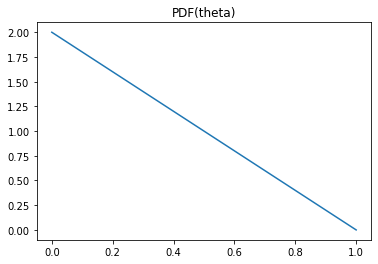

In [214]:
# Our current PDF for theta.
pdf_theta = lambda x: 2 * (1 - x)

# Plot PDF.
x = np.linspace(0, 1, 100)
plt.plot(x, pdf_theta(x))
plt.title("PDF(theta)")
plt.show()

### Update again...

In [183]:
# Draw heads or tails.
x = bernoulli(theta).rvs()
x

0

- **Prior**: $P(\theta) = 2(1 - \theta)d\theta$
- **Likelihood**: $P(x = 0 | \theta) = 1 - \theta$
- **Bayes numerator**: $2(1 - \theta)^2d\theta$
- **Total probability**: $P(x = 0) = \frac{2}{3}$
- **Posterior**: $P(\theta | x = 0) = 3(1 - \theta)^2d\theta$

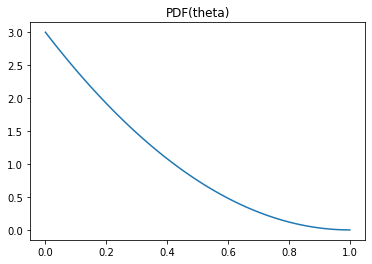

In [216]:
# Our current PDF for theta.
pdf_theta = lambda x: 3 * (1 - x) ** 2

# Plot PDF.
x = np.linspace(0, 1, 100)
plt.plot(x, pdf_theta(x))
plt.title("PDF(theta)")
plt.show()

### And again...

In [189]:
# Draw heads or tails.
x = bernoulli(theta).rvs()
x

1

- **Prior**: $P(\theta) = 3(1 - \theta)^2d\theta$
- **Likelihood**: $P(x = 1 | \theta) = \theta$
- **Bayes numerator**: $3\theta(1 - \theta)^2d\theta$
- **Total probability**: $P(x = 1) = \frac{1}{4}$
- **Posterior**: $P(\theta | x = 1) = 12\theta(1 - \theta)^2d\theta$

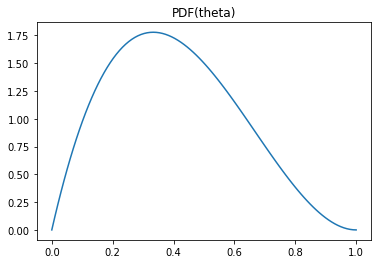

In [217]:
# Our current PDF for theta.
pdf_theta = lambda x: 12 * x * (1 - x) ** 2

# Plot PDF.
x = np.linspace(0, 1, 100)
plt.plot(x, pdf_theta(x))
plt.title("PDF(theta)")
plt.show()